In [ ]:
# 3 FUNKCE:
## 1. f(x) = x**2     na int. [0,2]
## 2. f(x) = ln(x-1)  na int. [1.1,5]
## 3. f(x) = cos(x)   na int. [0, pi]

## a) správné řešení pomocí scipy
## b) řešení pomocí ohraničené metody (půlení)
## c) řešení pomocí neohraničené metody (newtonova)

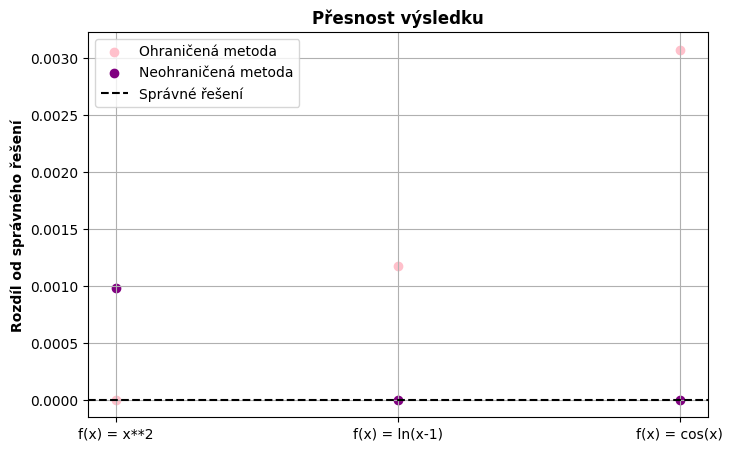

In [39]:
# PŘESNOST VÝSLEDKU
import matplotlib.pyplot as plt
import numpy as np

funkce = ["f(x) = x**2", "f(x) = ln(x-1)", "f(x) = cos(x)"]
ohranicene_rozdil = [abs(0-b_1), abs(2-b_2), abs(np.pi/2-b_3)]
neohranicene_rozdil = [abs(0-c_1), abs(2-c_2), abs(np.pi/2-c_3)]

plt.figure(figsize=(8,5))
plt.scatter(funkce,ohranicene_rozdil, marker="o", color= "pink", label = "Ohraničená metoda")
plt.scatter(funkce,neohranicene_rozdil, marker="o", color= "purple", label = "Neohraničená metoda")
plt.axhline(0, color="black", linestyle = "dashed", label = "Správné řešení")  # černá, přerušovaná osa x
plt.ylabel('Rozdíl od správného řešení', fontweight="bold")
plt.title("Přesnost výsledku", fontweight="bold")
plt.grid()
plt.legend()
plt.show()


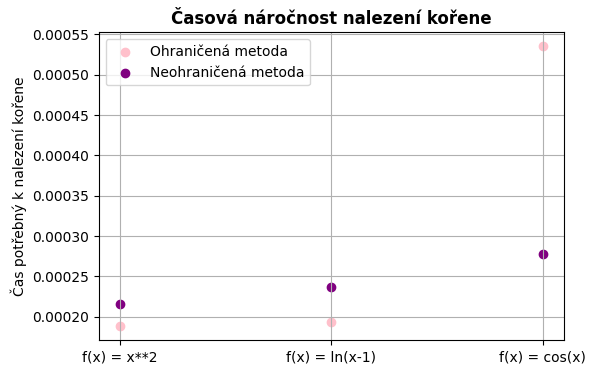

In [49]:
# ČASOVÁ NÁROČNOST NALEZENÍ KOŘENE
import matplotlib.pyplot as plt

funkce = ["f(x) = x**2", "f(x) = ln(x-1)", "f(x) = cos(x)"]
casy_b = [cas_1_b,cas_2_b,cas_3_b]
casy_c = [cas_1_c,cas_2_c,cas_3_c]

plt.figure(figsize=(6,4))
plt.scatter(funkce, casy_b, marker = "o" , color = "pink", label = "Ohraničená metoda")
plt.scatter(funkce, casy_c, marker = "o" , color = "purple", label = "Neohraničená metoda")
plt.ylabel("Čas potřebný k nalezení kořene")
plt.title("Časová náročnost nalezení kořene", fontweight = "bold")
plt.grid()
plt.legend()
plt.show()



Potřebné výpočty:

In [ ]:
# správné kořeny, sloužící k porovnání
import numpy as np
a_1 = 0
a_2 = 2
a_3 = np.pi/2

x = 0.0


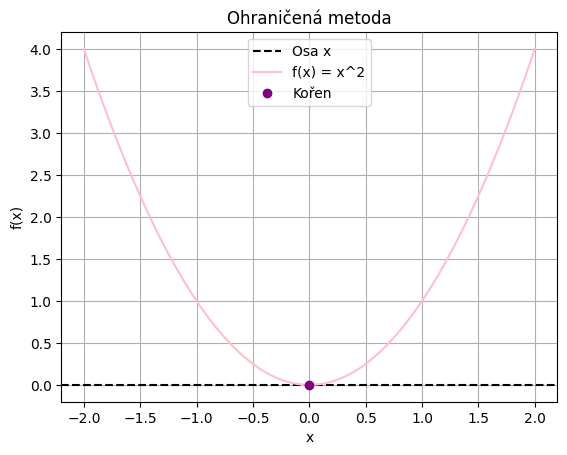

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import time 

start = time.perf_counter()
def ohranicena_metoda(f, zacatek_intervalu, konec_intervalu, pocet_puleni):
    a = zacatek_intervalu
    b = konec_intervalu
    n = pocet_puleni
    koren = np.empty(shape=[n])
    for i in range(n):
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        koren[i] = x
        return koren[i]

def f(x):
    return x**2 

b_1 = ohranicena_metoda(f,-2,2,10)
end = time.perf_counter()

print(f"x = {b_1}")
cas_1_b = end - start
        
plt.axhline(0, color="black", linestyle="dashed", label="Osa x")
interval = np.linspace(-2, 2, 100)
plt.plot(interval, f(interval), "pink", label="f(x) = x^2")
plt.plot(b_1, f(b_1), "o", color="purple", label="Kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Ohraničená metoda")
plt.legend()
plt.grid()
plt.show()


x = 1.9988281250000002


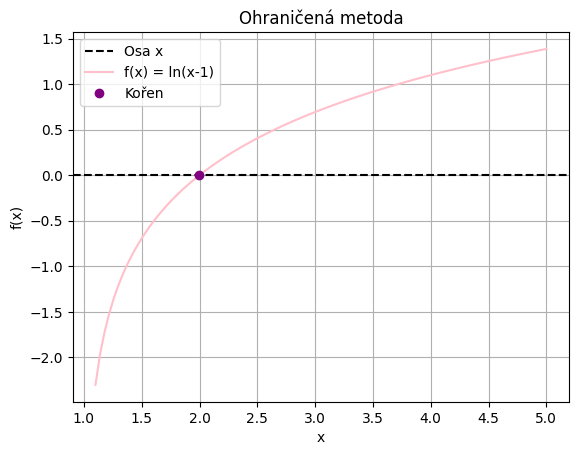

In [43]:

import matplotlib.pyplot as plt
import numpy as np
import time 

start = time.perf_counter()
def ohranicena_metoda(f, zacatek_intervalu, konec_intervalu, pocet_puleni):
    a = zacatek_intervalu
    b = konec_intervalu
    n = pocet_puleni
    koren = np.empty(shape=[n])
    for i in range(n):
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        koren[i] = x
    return koren[-1]

def f(x):
    return np.log(x-1)

b_2 = ohranicena_metoda(f, 1.1,5,8)
end = time.perf_counter()
print(f"x = {b_2}")
cas_2_b = end - start

plt.axhline(0, color="black", linestyle="dashed", label="Osa x")
interval = np.linspace(1.1, 5, 100)
plt.plot(interval, f(interval), "pink", label="f(x) = ln(x-1)")
plt.plot(b_2, f(b_2), "o", color="purple", label="Kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Ohraničená metoda")
plt.legend()
plt.grid()
plt.show()

x = 1.5738642883706677


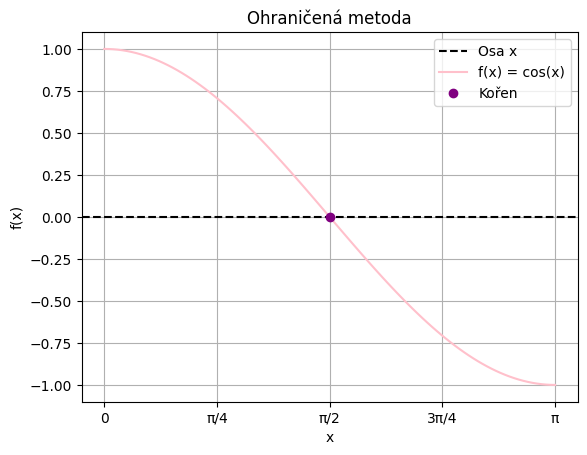

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import time 

start = time.perf_counter()
def ohranicena_metoda(f, zacatek_intervalu, konec_intervalu, pocet_puleni):
    a = zacatek_intervalu
    b = konec_intervalu
    n = pocet_puleni
    koren = np.empty(shape=[n])
    for i in range(n):
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        koren[i] = x
    return koren[-1]

def f(x):
    return np.cos(x)

b_3 = ohranicena_metoda(f, 0, np.pi, 10)
end = time.perf_counter()
print(f"x = {b_3}")
cas_3_b = end - start

plt.axhline(0, color="black", linestyle="dashed", label="Osa x")
interval = np.linspace(0, np.pi, 100)
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], ["0", "π/4", "π/2", "3π/4", "π"])
plt.plot(interval, f(interval), "pink", label='f(x) = cos(x)')
plt.plot(b_3, f(b_3), "o", color="purple", label="Kořen")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Ohraničená metoda")
plt.legend()
plt.grid()
plt.show()


x = -0.0009765624999998116


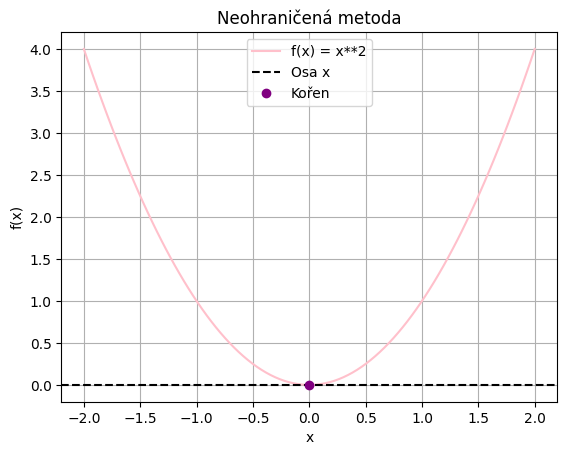

In [45]:
# NEOHRANIČENÁ METODA

import matplotlib.pyplot as plt
import time

start = time.perf_counter()
def neohranicena_metoda(funkce, zacatek_intervalu, delta=1E-3):
    x_novy = zacatek_intervalu
    x_stary = zacatek_intervalu
    def derivace_funkce(x, h=1E-3):
        return (funkce(x + h) - funkce(x - h)) / (2 * h)
    while True:
        x_stary = x_novy
        x_novy = x_stary - funkce(x_stary) / derivace_funkce(x_stary)
        if abs(x_novy - x_stary) <= delta:
            break   
    return x_novy

def f(x):
    return x**2

c_1 = neohranicena_metoda(f,-2)
end = time.perf_counter()
print(f"x = {c_1}")
cas_1_c = end-start

interval = np.linspace(-2,2,100) 
plt.plot(interval, f(interval), color="pink", label = "f(x) = x**2")
plt.title("Neohraničená metoda")
plt.axhline(0, color="black", linestyle = "dashed", label = "Osa x")  # černá, přerušovaná osa x
plt.plot(c_1,f(c_1),"o", color="purple", label = "Kořen") # fialový bod - kořen funkce
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


x = 1.9999999999992613


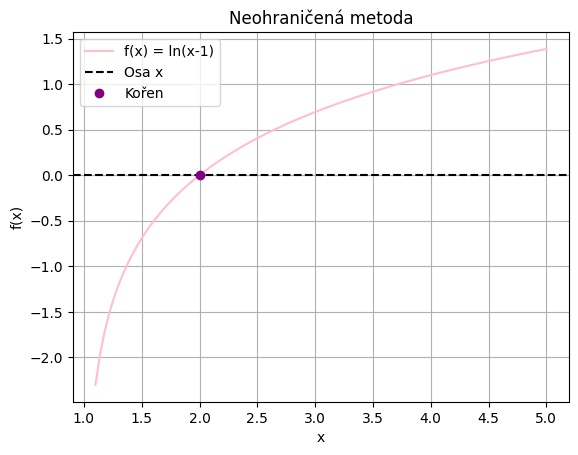

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import time

start = time.perf_counter()
def neohranicena_metoda(funkce, zacatek_intervalu, delta=1E-3):
    x_novy = zacatek_intervalu
    x_stary = zacatek_intervalu
    def derivace_funkce(x, h=1E-3):
        return (funkce(x + h) - funkce(x - h)) / (2 * h)
    while True:
        x_stary = x_novy
        x_novy = x_stary - funkce(x_stary) / derivace_funkce(x_stary)
        if abs(x_novy - x_stary) <= delta:
            break  
    return x_novy

def f(x):
    return np.log(x-1)

c_2 = neohranicena_metoda(f,1.1)
end = time.perf_counter()
print(f"x = {c_2}")
cas_2_c = end - start

interval = np.linspace(1.1,5,100) 
plt.plot(interval, f(interval), color="pink", label = "f(x) = ln(x-1)")
plt.title("Neohraničená metoda")
plt.axhline(0, color="black", linestyle = "dashed", label = "Osa x")  # černá, přerušovaná osa x
plt.plot(c_2,f(c_2),"o", color="purple", label = "Kořen") # fialový bod - kořen funkce
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()



x = 1.5707963267948974


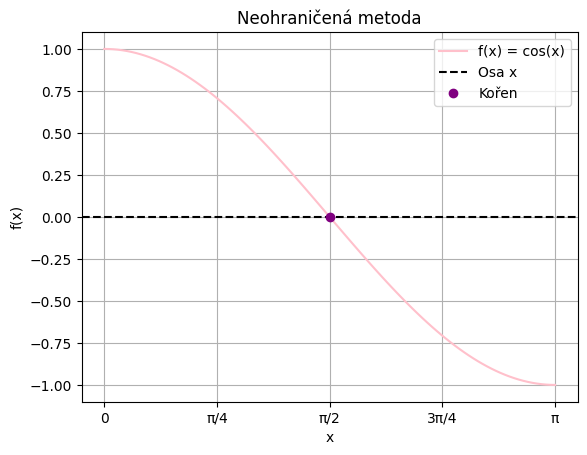

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import time

start = time.perf_counter()
def neohranicena_metoda(funkce, zacatek_intervalu, delta=1E-3):
    x_novy = zacatek_intervalu
    x_stary = zacatek_intervalu
    def derivace_funkce(x, h=1E-3):
        return (funkce(x + h) - funkce(x - h)) / (2 * h)
    while True:
        x_stary = x_novy
        x_novy = x_stary - funkce(x_stary) / derivace_funkce(x_stary)
        if abs(x_novy - x_stary) <= delta:
            break
    return x_novy

def f(x):
    return np.cos(x)

c_3 = neohranicena_metoda(f,0.5)
end = time.perf_counter()
print(f"x = {c_3}")
cas_3_c = end - start

interval = np.linspace(0,np.pi,100) 
plt.plot(interval, f(interval), color="pink", label = "f(x) = cos(x)")
plt.title("Neohraničená metoda")
plt.axhline(0, color="black", linestyle = "dashed", label = "Osa x")  # černá, přerušovaná osa x
plt.plot(c_3,f(c_3),"o", color="purple", label = "Kořen") # fialový bod - kořen funkce
plt.xlabel("x")
plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], ["0", "π/4", "π/2", "3π/4", "π"])
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


